<a href="https://colab.research.google.com/github/agrim-sri/Crime-Detection-Model/blob/main/event_detection_of_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.python import keras

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
#4/EAHvxOwTUUc5P4f054p_XPb6LUtIp67TjDF6lZaN8qOKZAuMbtL9Fow

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/BEPROJ/dataset/c3d_train/c3d.zip"
!ls Anomaly -l | egrep -c '^-'

unzip:  cannot find or open /content/drive/My Drive/BEPROJ/dataset/c3d_train/c3d.zip, /content/drive/My Drive/BEPROJ/dataset/c3d_train/c3d.zip.zip or /content/drive/My Drive/BEPROJ/dataset/c3d_train/c3d.zip.ZIP.
ls: cannot access 'Anomaly': No such file or directory
0


In [ ]:
import csv
import configparser
import collections
import time
import csv
import os
from os import listdir
import skimage.transform
from skimage import color
from os.path import isfile, join
import numpy as np
import numpy
from datetime import datetime
from os.path import basename
import glob
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math

In [ ]:
# count = 0
# image_list, label_list = [], []

# Load Training Dataset and label training videos
import re

def get_name(name):
  pattern = '[0-9]'
  return re.sub(pattern, '', name)

def load_dataset_Train_batch(AbnormalPath):

    batchsize=30            # Each batch contain 30 videos.
    n_exp=int(batchsize/2)  # 15 normal and 15 road accident videos

    Num_abnormal = 144  # number of road accident videos in Training set.


    # We assume the features of abnormal videos and normal videos are located in two different folders.
    Abnor_list_iter = np.random.permutation(Num_abnormal)
    # Abnor_list_iter = Abnor_list_iter[Num_abnormal-n_exp:] # Indexes for randomly selected Abnormal Videos

    AllVideos_Path = AbnormalPath
    def listdir_nohidden(AllVideos_Path):  # To ignore hidden files
        file_dir_extension = os.path.join(AllVideos_Path, '*_C.txt')
        for f in glob.glob(file_dir_extension):
            if not f.startswith('.'):
                yield os.path.basename(f)

    All_Videos=sorted(listdir_nohidden(AllVideos_Path))
    All_Videos.sort()
    AllFeatures = []  # To store C3D features of a batch
    print("Loading Abnormal videos Features...")

    Video_count=-1
    VideoLabels = []
    temp = ""
    ###################### READ RANDOMLY ABNORMAL FEATURE 32x512 #################
    for iv in Abnor_list_iter:
        Video_count=Video_count+1
        VideoPath = os.path.join(AllVideos_Path, All_Videos[iv])
        temp = VideoPath.split('/')[1].split('_')[0]
        events = [get_name(temp) for _ in range(32)]
        VideoLabels.extend(events)
        f = open(VideoPath, "r")
        words = f.read().split()
        num_feat = int(len(words) / 512)

        # Number of features per video to be loaded.
        # In our case num_feat=32, as we divide the video into 32 segments.

        count = -1;
        VideoFeatues = []

        for feat in range(0, num_feat):
            feat_row1 = np.float32(words[feat * 512:feat * 512 + 512])
            count = count + 1
            if count == 0:
                VideoFeatues = feat_row1
            if count > 0:
                VideoFeatues = np.vstack((VideoFeatues, feat_row1))

        if Video_count == 0:
            AllFeatures = VideoFeatues
        if Video_count > 0:
            AllFeatures = np.vstack((AllFeatures, VideoFeatues))

    return AllFeatures,VideoLabels


In [ ]:
AbnormalPath = os.path.join('Anomaly/')  # Path of abnormal already computed C3D features
image_list,  label_list =load_dataset_Train_batch(AbnormalPath)  # Load normal and abnormal video C3D features

Loading Abnormal videos Features...
Explosion018


In [ ]:
image_size = len(image_list)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
# pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
np_image_list.shape

(4608, 512)

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.35, random_state = 2)

[INFO] Spliting data to train, test


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

print("Accuracy: ", clf.score(x_test,y_test))

Accuracy:  0.7947923124612524


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
print("Accuracy: ", neigh.score(x_test,y_test))

Accuracy:  0.9869807811531308


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have your features (x) and labels (y)
# Replace x_train, x_test, y_train, y_test with your actual data
# Example data:
# x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm_clf = SVC(kernel='linear', random_state=0)
svm_clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)


NameError: name 'x_train' is not defined

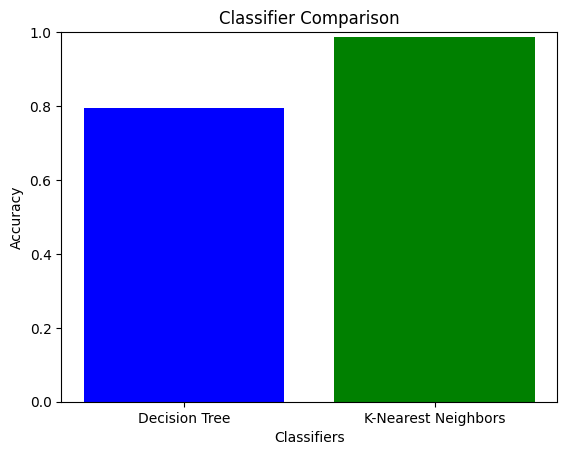

In [ ]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['Decision Tree', 'K-Nearest Neighbors']

# Corresponding accuracies
accuracies = [0.7947923124612524, 0.9869807811531308]

# Plotting the bar graph
plt.bar(classifiers, accuracies, color=['blue', 'green'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison')
plt.ylim([0, 1])  # Set y-axis limit to 0-1 for accuracy scale
plt.show()


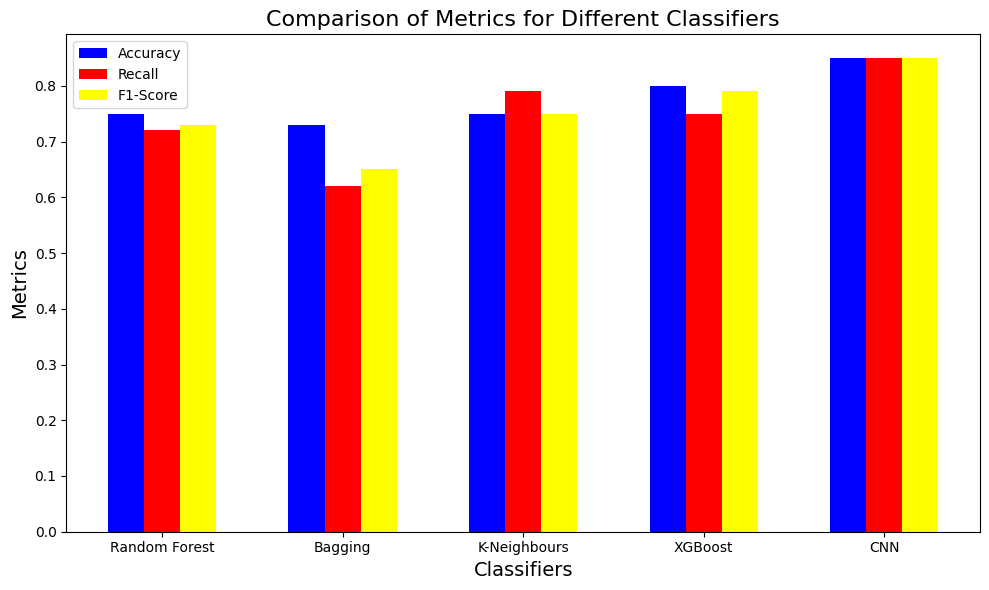

In [ ]:
import matplotlib.pyplot as plt

# Data
classifiers = ['Random Forest', 'Bagging', 'K-Neighbours', 'XGBoost', 'CNN']
accuracy = [0.75, 0.73, 0.75, 0.80, 0.85]
recall = [0.72, 0.62, 0.79, 0.75, 0.85]
f1_score = [0.73, 0.65, 0.75, 0.79, 0.85]

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(classifiers))

plt.bar(index, accuracy, color='blue', width=bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], recall, color='red', width=bar_width, label='Recall')
plt.bar([i + bar_width*2 for i in index], f1_score, color='yellow', width=bar_width, label='F1-Score')

# Add labels and title
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.title('Comparison of Metrics for Different Classifiers', fontsize=16)
plt.xticks([i + bar_width for i in index], classifiers)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
